In [1]:
from traffic.data import sectors, opensky
rep = opensky.history("2017-02-05", "2017-02-06", callsign="EZY158T",
                      bounds=sectors['LFBB/FIR'])

rep.head()

100%|██████████| 23/23 [00:00<00:00, 26.60it/s]


,timestamp,icao24,latitude,longitude,ground_speed,track,vertical_rate,callsign,onground,alert,spi,squawk,baro_altitude,altitude,last_position,hour
0,2017-02-05 16:26:13,406d95,47.166092,2.091934,426.438373,184.707852,768.0,EZY158T,false,false,false,1000,30675.0,29500.0,2017-02-05 16:26:12.843,1486306800
1,2017-02-05 16:26:14,406d95,47.163701,2.091698,426.438373,184.707852,768.0,EZY158T,false,false,false,1000,30675.0,29500.0,2017-02-05 16:26:13.470,1486306800
2,2017-02-05 16:26:15,406d95,47.161743,2.091454,426.438373,184.707852,768.0,EZY158T,false,false,false,1000,30700.0,29500.0,2017-02-05 16:26:14.819,1486306800
3,2017-02-05 16:26:16,406d95,47.159409,2.091179,426.438373,184.707852,896.0,EZY158T,false,false,false,1000,30725.0,29525.0,2017-02-05 16:26:15.597,1486306800
4,2017-02-05 16:26:17,406d95,47.159409,2.091179,427.435006,184.696850,960.0,EZY158T,false,false,false,1000,30725.0,29550.0,2017-02-05 16:26:15.597,1486306800


In [2]:
# More advanced plotting
from cartopy.feature import NaturalEarthFeature
from cartopy.crs import PlateCarree, EuroPP

countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)


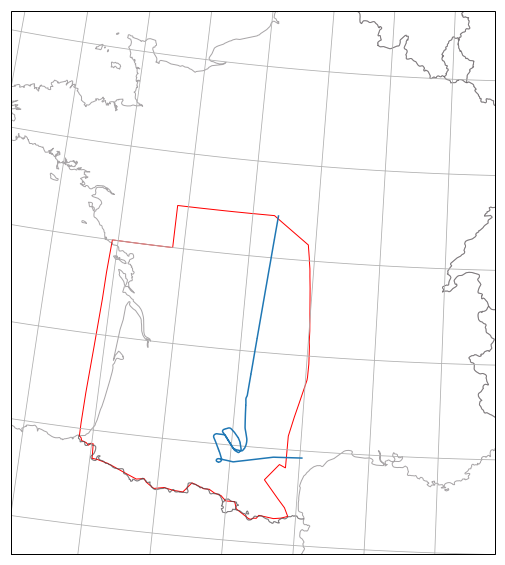

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-3, 7, 42, 50))

ax.plot(rep.longitude, rep.latitude, transform=PlateCarree())
sectors['LFBB/FIR'].plot(ax)

In [4]:
from traffic.data import opensky
online_aircraft = opensky.online_aircraft()

In [5]:
online_aircraft.head()

,icao24,callsign,last_position,timestamp,longitude,latitude,altitude,onground,ground_speed,track,vertical_rate,baro_altitude,squawk,position_source
2039,78049f,CSZ9998,2018-03-26 16:43:04,2018-03-26 16:43:21,113.2906,23.3061,975.0,False,127.574514,13.60,-704.724409,1250.0,2752,0
4330,3444c7,VLG12MN,2018-03-26 16:43:22,2018-03-26 16:43:22,-4.2943,42.6004,33025.0,False,418.626350,277.55,0.000000,33500.0,0421,0
1777,8960da,UAE192,2018-03-26 16:43:20,2018-03-26 16:43:22,-3.7994,36.7090,35000.0,False,520.775378,103.21,0.000000,35500.0,5431,0
2195,3c6307,TUI2B,2018-03-26 16:42:25,2018-03-26 16:43:22,-15.0117,29.2600,29450.0,False,412.755940,197.34,-2944.881890,33225.0,1402,0
1885,300691,ITOMS,2018-03-26 16:43:22,2018-03-26 16:43:23,8.2174,46.2281,8350.0,False,128.079914,349.66,64.960630,8425.0,7000,0


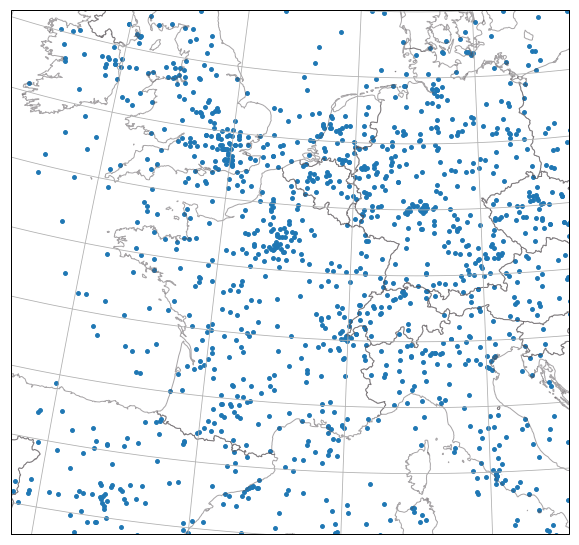

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-7, 15, 40, 55))

ax.scatter(online_aircraft.longitude, online_aircraft.latitude,
           transform=PlateCarree(), s=15)

(5231, 16)

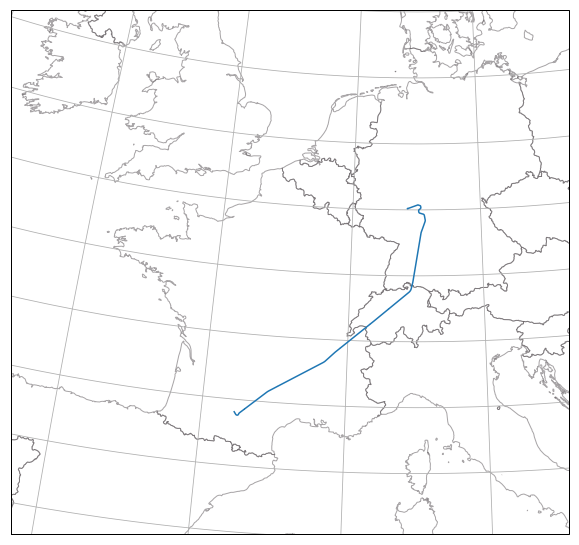

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-7, 15, 40, 55))
import pandas as pd
flight = pd.read_pickle("/home/xo/dlh66n.pkl")

ax.plot(flight.longitude, flight.latitude, transform=PlateCarree())
flight.shape